In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

Para simular un sistema de Revisión de Pedido (ROP) o punto de reorden en un modelo de inventario, necesitaremos definir una serie de condiciones iniciales y parámetros que influirán en el comportamiento del sistema. Este modelo ayuda a determinar cuándo realizar un pedido y la cantidad de pedido para mantener el nivel de stock deseado, minimizando los costos asociados y evitando la escasez. A continuación, te propongo un esquema básico con ideas para configurar y analizar la sensibilidad del sistema ROP.

1. Condiciones Iniciales y Parámetros

Para comenzar, definamos las condiciones iniciales y los parámetros esenciales para el modelo ROP:

+ Demanda: Establecer una tasa de demanda promedio (por día, semana, etc.) y considerar si esta varía en el tiempo (por ejemplo, estacionalidad).
+ Tiempo de entrega (Lead time): El tiempo desde que se realiza el pedido hasta que se recibe. Puede ser constante o variable.
+ Costo de pedido: Costo fijo asociado a realizar un pedido, sin importar la cantidad ordenada.
+ Costo de mantenimiento de inventario: Costo de mantener una unidad de inventario en stock por unidad de tiempo.
+ Costo de escasez: Costo de no poder satisfacer la demanda inmediata de un producto.
+ Nivel de servicio deseado: Probabilidad de no incurrir en escasez entre periodos de pedido.
+ Stock inicial: Cantidad inicial de inventario disponible.
+ Punto de reorden (ROP): Nivel de inventario que dispara un nuevo pedido.
+ Cantidad de Pedido (Q): Cantidad a pedir una vez que el inventario alcanza el ROP. Puede ser una cantidad fija o variable según alguna política de inventario, como Lote por Lote, Cantidad Económica de Pedido (EOQ), etc.

2. Simulación del Sistema ROP

El modelo puede simularse siguiendo estos pasos:

+ Inicialización: Establecer las condiciones iniciales y parámetros.
+ Operación diaria (o por periodo):
+ Reducir el inventario según la demanda.
+ Verificar si el nivel de inventario ha caído al ROP o por debajo.
+ Si es así, generar un pedido que será recibido después del tiempo de entrega.
+ Añadir cualquier pedido recibido al inventario.
+ Calcular costos diarios de mantener el inventario y, si aplica, costos de escasez.
+ Actualización y repetición: Repetir para el siguiente periodo hasta completar el horizonte de simulación.

3. Análisis de Sensibilidad

Una vez establecido el modelo, el análisis de sensibilidad ayuda a entender cómo diferentes condiciones iniciales y parámetros afectan el sistema. Por ejemplo:

+ ¿Cómo varía el costo total bajo diferentes tasas de demanda?
+ Impacto del tiempo de entrega en el nivel de servicio.
+ Sensibilidad del costo total a variaciones en los costos de pedido y mantenimiento.
+ Efectos de diferentes niveles de servicio deseado en la cantidad de pedido y frecuencia.

4. Implementación en Python

Podemos comenzar con una implementación básica en Python que permita ajustar estos parámetros y observar sus efectos. Será útil para realizar múltiples corridas de simulación con diferentes configuraciones y analizar los resultados.

Empecemos con una implementación básica en Python de un sistema ROP (Punto de Reorden). Este script simulará el funcionamiento del inventario bajo condiciones establecidas y permitirá realizar análisis de sensibilidad variando los parámetros clave.

Primero, definiremos las funciones y parámetros iniciales, incluyendo la demanda, tiempo de entrega, costos, y más. Luego, implementaremos un bucle de simulación para un periodo de tiempo específico y calcularemos los costos asociados.

#  Implementación básica en Python de un sistema ROP (Punto de Reorden).

## Paso 1: Definición de Parámetros y Condiciones Iniciales

In [2]:
# Parámetros iniciales
demanda_promedio = 100  # unidades por periodo
desviacion_demanda = 20  # para simular variabilidad en la demanda
tiempo_entrega_promedio = 2  # periodos
desviacion_tiempo_entrega = 1  # para simular variabilidad en el tiempo de entrega
costo_pedido = 50  # costo fijo por pedido
costo_mantenimiento = 0.5  # costo de mantener una unidad en inventario por periodo
costo_escasez = 10  # costo por unidad faltante
nivel_servicio_deseado = 0.95  # probabilidad de no incurrir en escasez
stock_inicial = 500  # unidades iniciales en inventario
dias_simulacion = 30  # total de dias para la simulación

# Punto de reorden (ROP) y Cantidad de Pedido (Q) aún por definir


## Paso 2: Función para Simular la Demanda
Para simular la demanda, asumiremos que sigue una distribución normal alrededor de la demanda promedio. Esta es una simplificación; podrías ajustar esto para reflejar mejor tu situación específica.

In [3]:
def simular_demanda(demanda_promedio, desviacion_demanda):
    return max(0, np.random.normal(demanda_promedio, desviacion_demanda))

## Paso 3: Simulación del Inventario
Implementaremos el bucle de simulación, considerando el tiempo de entrega variable y calculando los costos asociados.

In [4]:
def simular_inventario(dias_simulacion, demanda_promedio, desviacion_demanda, tiempo_entrega_promedio, desviacion_tiempo_entrega, costo_pedido, costo_mantenimiento, costo_escasez, stock_inicial):
    inventario = stock_inicial
    pedidos_en_camino = []
    costo_total = 0

    for dia in range(dias_simulacion):
        demanda_diaria = simular_demanda(demanda_promedio, desviacion_demanda)
        inventario -= demanda_diaria

        # Actualizar inventario con pedidos recibidos
        pedidos_en_camino = [(tiempo-1, cantidad) for tiempo, cantidad in pedidos_en_camino if tiempo > 1]
        pedidos_recibidos_hoy = sum(cantidad for tiempo, cantidad in pedidos_en_camino if tiempo <= 1)
        inventario += pedidos_recibidos_hoy

        # Verificar si es necesario realizar un pedido
        if inventario <= ROP:  # ROP debe ser calculado o definido
            cantidad_pedido = Q  # Q debe ser calculado o definido
            tiempo_entrega = max(1, np.random.normal(tiempo_entrega_promedio, desviacion_tiempo_entrega))
            pedidos_en_camino.append((tiempo_entrega, cantidad_pedido))
            costo_total += costo_pedido

        # Calcular costos de mantenimiento y escasez
        if inventario > 0:
            costo_total += inventario * costo_mantenimiento
        else:
            costo_total += abs(inventario) * costo_escasez

    return costo_total


## Paso 4: Definición de ROP y Q
Antes de poder ejecutar la simulación, necesitas definir cómo calcularás el ROP y la Cantidad de Pedido (Q). Estos pueden basarse en fórmulas estándar o adaptarse a tu caso particular.

Para definir el Punto de Reorden (ROP) y la Cantidad de Pedido (Q) en nuestro sistema de inventario, utilizaremos conceptos básicos de gestión de inventarios. La Cantidad de Pedido puede basarse en la fórmula de la Cantidad Económica de Pedido (EOQ) para optimizar los costos, mientras que el ROP asegura que se haga un pedido justo a tiempo para reponer el inventario antes de que se agote, teniendo en cuenta el tiempo de entrega.

Cantidad Económica de Pedido (EOQ)
La EOQ es una fórmula clásica utilizada para minimizar los costos totales de mantenimiento y pedido. La fórmula es:

$$
EOQ = \sqrt{\frac{2DS}{H}}
$$

donde:

+ $D$ es la demanda anual (unidades/año),
+ $S$ es el costo de realizar un pedido,
+ $H$ es el costo de mantenimiento por unidad por año.

### Punto de Reorden (ROP)

El ROP se calcula considerando el tiempo de entrega y la demanda durante ese tiempo. Una fórmula simple para calcular el ROP es:

$$
ROP = d \times L + \text{Stock de Seguridad}
$$

donde:

+ $d$ es la demanda promedio por periodo,
+ $L$ es el tiempo de entrega promedio (en los mismos periodos que $d$).

$\text{Stock de Seguridad}$ puede calcularse:

$$
\text{Stock de Seguridad} = Z \times \sigma_{DL}
$$

donde:

+ $Z$ es el número de desviaciones estándar para el nivel de servicio deseado (por ejemplo, para un nivel de servicio del 95%, Z sería aproximadamente 1.65),
+ $\sigma_{DL}$ es la desviación estándar de la demanda durante el tiempo de entrega. Esto puede calcularse como $\sigma_{demanda} \times \sqrt{L}$ donde $\sigma_{demanda}$ es la desviación estándar de la demanda por periodo y $L$ es el tiempo de entrega entre periodos.


In [5]:
# Parámetros adicionales
demanda_anual = demanda_promedio * 365  # Convertimos la demanda diaria a anual
costo_mantenimiento_anual = costo_mantenimiento * 365  # Asumimos 365 días para simplificar

# Calcular EOQ
Q = math.sqrt((2 * demanda_anual * costo_pedido) / costo_mantenimiento_anual)

# Calcular ROP
Z = 1.65  # Para un nivel de servicio del 95%
# Calculando el Stock de Seguridad
sigma_demanda = desviacion_demanda  # Desviación estándar de la demanda por periodo
sigma_DL = sigma_demanda * math.sqrt(tiempo_entrega_promedio)  # Desviación estándar de la demanda durante el tiempo de entrega
stock_de_seguridad = Z * sigma_DL

# Actualizando el cálculo del ROP para incluir el stock de seguridad
ROP_con_seguridad = (demanda_promedio * tiempo_entrega_promedio) + stock_de_seguridad

print(f"Stock de Seguridad: {stock_de_seguridad:.2f} unidades")
print(f"ROP (con Stock de Seguridad): {ROP_con_seguridad:.2f} unidades")


Stock de Seguridad: 46.67 unidades
ROP (con Stock de Seguridad): 246.67 unidades


## Código completo

In [6]:
# Parámetros
demanda_promedio = 100  # unidades por día
desviacion_demanda = 20
tiempo_entrega_promedio = 2  # días
desviacion_tiempo_entrega = 1
costo_pedido = 50  # Costo por realizar un pedido
costo_mantenimiento = 0.5  # Costo de mantenimiento por unidad por día
costo_escasez = 10  # Costo por unidad faltante
nivel_servicio_deseado = 0.95
stock_inicial = 500
dias_simulacion = 2*365  # Simularemos 2 años
Z = 1.65  # Z-score para un nivel de servicio del 95%

# Calculando EOQ (ignorando variaciones estacionales o de tendencia para simplificar)
demanda_anual = demanda_promedio * 365
costo_mantenimiento_anual = costo_mantenimiento * 365
Q = math.sqrt((2 * demanda_anual * costo_pedido) / costo_mantenimiento_anual)

# Calculando ROP y Stock de Seguridad
sigma_demanda = desviacion_demanda
sigma_DL = sigma_demanda * math.sqrt(tiempo_entrega_promedio)
stock_de_seguridad = Z * sigma_DL
ROP = (demanda_promedio * tiempo_entrega_promedio) + stock_de_seguridad

# Función de demanda simulada
def simular_demanda(demanda_promedio, desviacion_demanda):
    return max(0, np.random.normal(demanda_promedio, desviacion_demanda))

# Simulación del inventario
def simular_inventario(dias_simulacion, ROP, Q, stock_inicial):
    inventario = stock_inicial
    pedidos_en_camino = []
    costo_total = 0

    for dia in range(dias_simulacion):
        demanda_diaria = simular_demanda(demanda_promedio, desviacion_demanda)
        inventario -= demanda_diaria

        # Verificar y manejar pedidos en camino
        pedidos_en_camino = [(t-1, q) for t, q in pedidos_en_camino if t > 1]
        pedidos_recibidos_hoy = sum(q for t, q in pedidos_en_camino if t <= 1)
        inventario += pedidos_recibidos_hoy

        # Realizar un pedido si se alcanza el ROP
        if inventario <= ROP:
            pedidos_en_camino.append((tiempo_entrega_promedio, Q))
            costo_total += costo_pedido

        # Calcular costos
        if inventario > 0:
            costo_total += inventario * costo_mantenimiento
        else:
            costo_total += abs(inventario) * costo_escasez

    return costo_total, inventario

# Ejecutando la simulación
costo_total, inventario_final = simular_inventario(dias_simulacion, ROP, Q, stock_inicial)
print(f"Costo total después de {dias_simulacion} días: {costo_total}")
print(f"Inventario final: {inventario_final}")


Costo total después de 730 días: 104433.78341644265
Inventario final: 211.3665603509784


In [7]:
def simular_inventario(dias_simulacion, ROP, Q, stock_inicial):
    inventario = stock_inicial
    pedidos_en_camino = []
    costo_total = 0
    registro_inventario = []  # Para registrar el nivel de inventario diario
    costos_diarios = []  # Para registrar los costos diarios
    pedidos_realizados = []  # Para registrar cuándo se realizan los pedidos

    for dia in range(dias_simulacion):
        demanda_diaria = simular_demanda(demanda_promedio, desviacion_demanda)
        inventario -= demanda_diaria
        registro_inventario.append(inventario)

        # Verificar y manejar pedidos en camino
        pedidos_en_camino = [(t-1, q) for t, q in pedidos_en_camino if t > 1]
        pedidos_recibidos_hoy = sum(q for t, q in pedidos_en_camino if t <= 1)
        inventario += pedidos_recibidos_hoy

        # Realizar un pedido si se alcanza el ROP
        if inventario <= ROP:
            pedidos_en_camino.append((tiempo_entrega_promedio, Q))
            costo_total += costo_pedido
            pedidos_realizados.append(dia)

        # Calcular costos
        costo_dia = 0
        if inventario > 0:
            costo_dia = inventario * costo_mantenimiento
        else:
            costo_dia = abs(inventario) * costo_escasez
        costo_total += costo_dia
        costos_diarios.append(costo_dia)

    return costo_total, inventario_final, registro_inventario, costos_diarios, pedidos_realizados

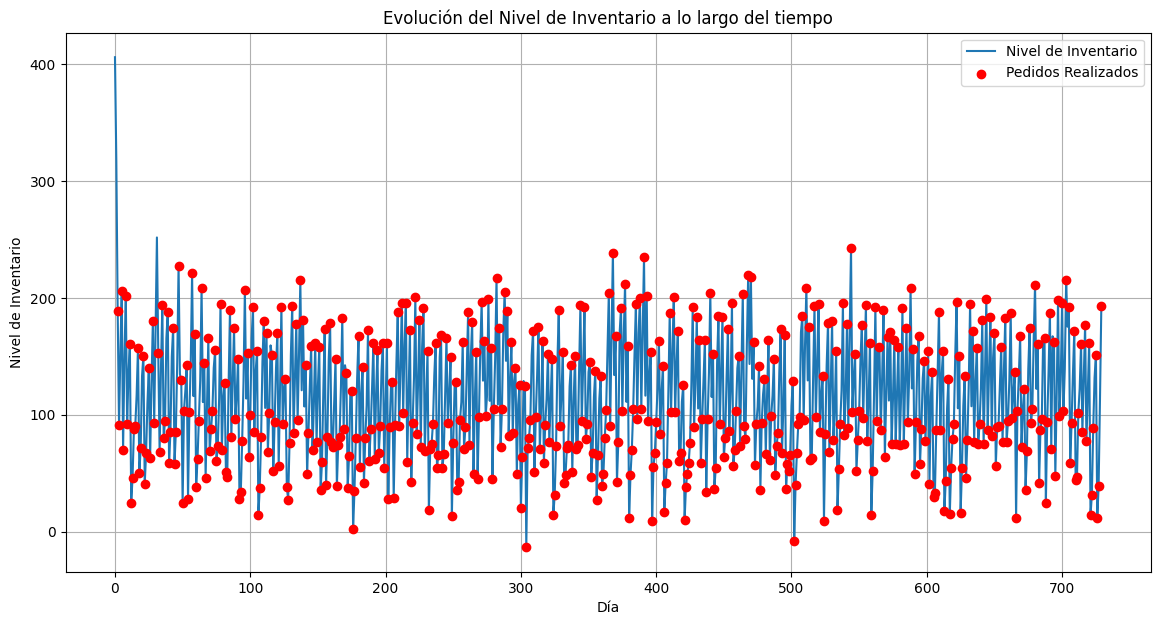

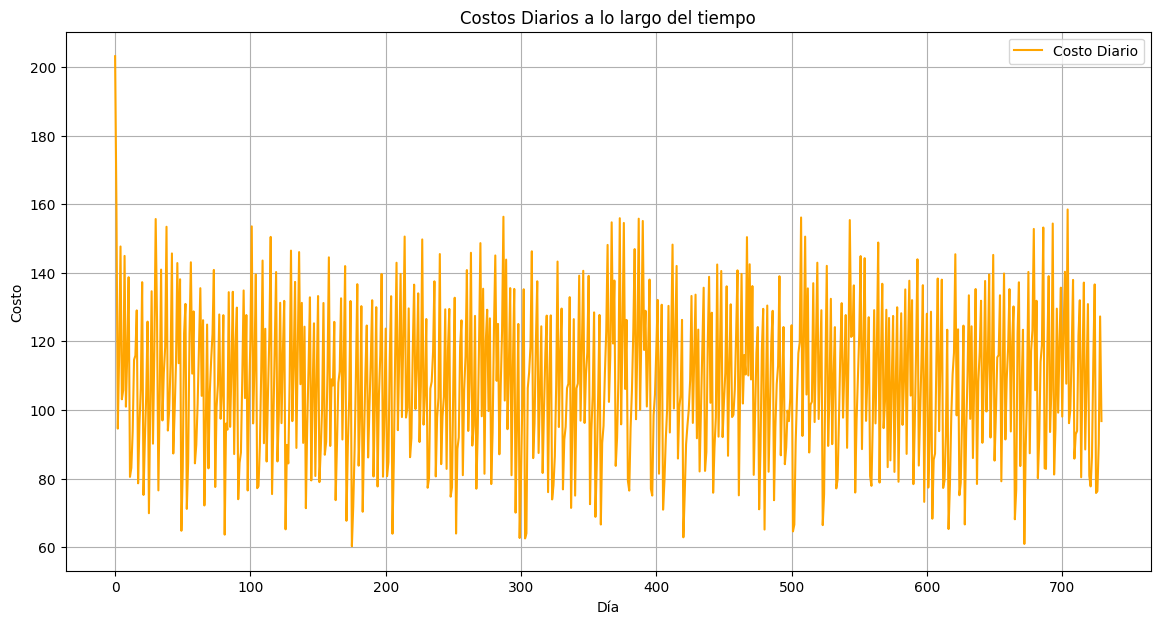

In [8]:
# Ejecutando la simulación con registro de datos
costo_total, inventario_final, registro_inventario, costos_diarios, pedidos_realizados = simular_inventario(dias_simulacion, ROP, Q, stock_inicial)

# Visualización del nivel de inventario a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(registro_inventario, label='Nivel de Inventario')
plt.scatter(pedidos_realizados, [registro_inventario[dia] for dia in pedidos_realizados], color='red', label='Pedidos Realizados', zorder=5)
plt.title('Evolución del Nivel de Inventario a lo largo del tiempo')
plt.xlabel('Día')
plt.ylabel('Nivel de Inventario')
plt.legend()
plt.grid(True)
plt.show()

# Visualización de los costos diarios
plt.figure(figsize=(14, 7))
plt.plot(costos_diarios, label='Costo Diario', color='orange')
plt.title('Costos Diarios a lo largo del tiempo')
plt.xlabel('Día')
plt.ylabel('Costo')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Asegúrate de tener los resultados de la simulación disponibles
# costo_total, inventario_final, registro_inventario, costos_diarios, pedidos_realizados = simular_inventario(...)

# Creación del DataFrame
dias = list(range(dias_simulacion))
datos = {
    'Día': dias,
    'Nivel de Inventario': registro_inventario,
    'Costo Diario': costos_diarios,
    'Pedido Realizado': ['Sí' if dia in pedidos_realizados else 'No' for dia in dias]
}

df = pd.DataFrame(datos)

# Mostrar las primeras filas del DataFrame para obtener una vista previa
print(df.head(10))

# Si deseas ver más filas, puedes ajustar el número dentro de .head() o usar .tail() para ver las últimas filas.


   Día  Nivel de Inventario  Costo Diario Pedido Realizado
0    0           406.231865    203.115932               No
1    1           317.212559    158.606280               No
2    2           189.116418     94.558209               Sí
3    3            90.906967    116.164162               Sí
4    4           153.890847    147.656102               No
5    5           206.228520    103.114260               Sí
6    6            70.108271    105.764813               Sí
7    7           148.390056    144.905706               No
8    8           201.913012    100.956506               Sí
9    9            91.790418    116.605887               Sí


In [10]:
def simular_inventario(dias_simulacion, ROP, Q, stock_inicial):
    inventario = stock_inicial
    pedidos_en_camino = []
    costo_total = 0
    registro_inventario = []
    costos_diarios = []
    pedidos_realizados = []
    ventas_diarias = []  # Registrar ventas (demanda) diarias
    cantidades_pedidos = []  # Registrar la cantidad de cada pedido

    for dia in range(dias_simulacion):
        demanda_diaria = int(simular_demanda(demanda_promedio, desviacion_demanda))
        ventas_diarias.append(demanda_diaria)
        inventario -= demanda_diaria
        registro_inventario.append(inventario)

        # Manejo de pedidos en camino
        pedidos_en_camino = [(t-1, q) for t, q in pedidos_en_camino if t > 1]
        pedidos_recibidos_hoy = sum(q for t, q in pedidos_en_camino if t <= 1)
        inventario += pedidos_recibidos_hoy

        # Realizar pedido si se alcanza el ROP
        if inventario <= ROP:
            pedidos_en_camino.append((tiempo_entrega_promedio, Q))
            pedidos_realizados.append(dia)
            cantidades_pedidos.append(Q)  # Registrar la cantidad pedida
            costo_total += costo_pedido
        else:
            cantidades_pedidos.append(0)  # No se realizó pedido

        # Calcular costos
        costo_dia = 0
        if inventario > 0:
            costo_dia = inventario * costo_mantenimiento
        else:
            costo_dia = abs(inventario) * costo_escasez
        costo_total += costo_dia
        costos_diarios.append(costo_dia)

    return costo_total, inventario_final, registro_inventario, costos_diarios, pedidos_realizados, ventas_diarias, cantidades_pedidos


In [11]:
# Asumiendo que ya has ejecutado la función simular_inventario con los cambios y tienes los resultados
costo_total, inventario_final, registro_inventario, costos_diarios, pedidos_realizados, ventas_diarias, cantidades_pedidos = simular_inventario(dias_simulacion, ROP, Q, stock_inicial)

datos = {
    'Día': list(range(dias_simulacion)),
    'Nivel de Inventario': registro_inventario,
    'Costo Diario': costos_diarios,
    'Pedido Realizado': ['Sí' if dia in pedidos_realizados else 'No' for dia in list(range(dias_simulacion))],
    'Ventas Diarias': ventas_diarias,
    'Cantidad Pedida': cantidades_pedidos
}

df = pd.DataFrame(datos)

# Visualización de las primeras filas para verificar
print(df.head(10))



   Día  Nivel de Inventario  Costo Diario Pedido Realizado  Ventas Diarias  \
0    0           390.000000    195.000000               No             110   
1    1           254.000000    127.000000               No             136   
2    2           165.000000     82.500000               Sí              89   
3    3            44.000000     92.710678               Sí             121   
4    4           116.421356    128.921356               No              69   
5    5           176.842712     88.421356               Sí              81   
6    6            62.842712    102.132034               Sí             114   
7    7           103.264069    122.342712               Sí             101   
8    8           153.685425    147.553391               No              91   
9    9           188.106781     94.053391               Sí             107   

   Cantidad Pedida  
0         0.000000  
1         0.000000  
2       141.421356  
3       141.421356  
4         0.000000  
5       141.421

# Análisis de sensibilidad

El análisis de sensibilidad en un modelo de inventario ROP (Reorder Point) te permite evaluar cómo diferentes cambios en los parámetros del sistema afectan los resultados, como el costo total, el nivel de inventario final, y la frecuencia de los pedidos. Este análisis es crucial para entender la robustez de tu sistema de inventario y para identificar los parámetros más críticos que influyen en el rendimiento del sistema.

Para realizar un análisis de sensibilidad, puedes variar sistemáticamente uno o más parámetros del modelo mientras mantienes los demás constantes. Luego, observas cómo estas variaciones afectan las métricas de interés. Vamos a cubrir dos enfoques comunes para el análisis de sensibilidad:

1. Análisis de Sensibilidad Univariable

Este enfoque implica cambiar un solo parámetro a la vez para ver su efecto en el sistema. Por ejemplo, podrías variar la demanda promedio ($d$) desde un 10% menos hasta un 10% más del valor base y observar cómo cambian el costo total y el nivel de inventario final.

Implementación:

+ Selecciona el Parámetro a Variar: Por ejemplo, la demanda promedio.
+ Define un Rango de Variación: Por ejemplo, de -10% a +10% del valor base.
+ Simula y Registra Resultados: Para cada valor del parámetro en este rango, ejecuta la simulación y registra las métricas clave.
+ Analiza los Resultados: Usa gráficas o tablas para visualizar cómo la variación del parámetro afecta las métricas de interés.

2. Análisis de Sensibilidad Multivariable

Este enfoque implica cambiar múltiples parámetros al mismo tiempo para entender las interacciones entre ellos. Aunque es más complejo y requiere más simulaciones, ofrece una visión más completa de la sensibilidad del sistema.

Implementación:

+ Selecciona los Parámetros a Variar: Por ejemplo, demanda promedio y tiempo de entrega.
+ Define Rangos de Variación para Cada Parámetro.
+ Simula y Registra Resultados para Combinaciones de Parámetros: Esto se puede hacer en una grilla de valores para cada parámetro, lo que puede requerir un número + significativo de simulaciones.
+ Analiza los Resultados: Identifica combinaciones de parámetros que resultan en cambios significativos en las métricas de interés.
    
Ejemplo Práctico en Python

Aquí hay un ejemplo simplificado de cómo podrías implementar un análisis de sensibilidad univariable en Python para el parámetro de demanda promedio:

In [12]:
def simular_inventario(dias_simulacion, ROP, Q, stock_inicial, demanda_promedio_variable):
    inventario = stock_inicial
    pedidos_en_camino = []
    costo_total = 0
    registro_inventario = []
    costos_diarios = []
    pedidos_realizados = []
    ventas_diarias = []  # Registrar ventas (demanda) diarias
    cantidades_pedidos = []  # Registrar la cantidad de cada pedido

    for dia in range(dias_simulacion):
        demanda_diaria = int(simular_demanda(demanda_promedio_variable, desviacion_demanda))
        ventas_diarias.append(demanda_diaria)
        inventario -= demanda_diaria
        registro_inventario.append(inventario)

        # Manejo de pedidos en camino
        pedidos_en_camino = [(t-1, q) for t, q in pedidos_en_camino if t > 1]
        pedidos_recibidos_hoy = sum(q for t, q in pedidos_en_camino if t <= 1)
        inventario += pedidos_recibidos_hoy

        # Realizar pedido si se alcanza el ROP
        if inventario <= ROP:
            pedidos_en_camino.append((tiempo_entrega_promedio, Q))
            pedidos_realizados.append(dia)
            cantidades_pedidos.append(Q)  # Registrar la cantidad pedida
            costo_total += costo_pedido
        else:
            cantidades_pedidos.append(0)  # No se realizó pedido

        # Calcular costos
        costo_dia = 0
        if inventario > 0:
            costo_dia = inventario * costo_mantenimiento
        else:
            costo_dia = abs(inventario) * costo_escasez
        costo_total += costo_dia
        costos_diarios.append(costo_dia)

    return costo_total, inventario, registro_inventario, costos_diarios, pedidos_realizados, ventas_diarias, cantidades_pedidos


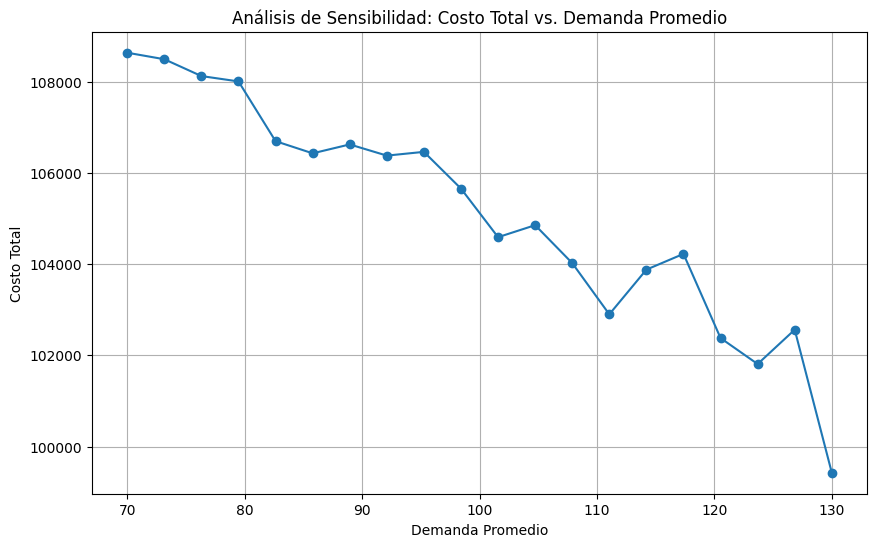

In [19]:
# Definir el rango de variación para la demanda promedio
variaciones_demanda = np.linspace(0.7 * demanda_promedio, 1.3 * demanda_promedio, 20)  # 5 puntos desde -10% a +10%

# Registro de resultados
resultados = []

for nueva_demanda in variaciones_demanda:
    # Asumiendo que tienes una función de simulación que acepta demanda_promedio como parámetro
    costo_total, _, _, _, _, _, _ = simular_inventario(dias_simulacion, ROP, Q, stock_inicial, nueva_demanda)
    resultados.append((nueva_demanda, costo_total))

# Convertir resultados a DataFrame para análisis
df_resultados = pd.DataFrame(resultados, columns=['Demanda Promedio', 'Costo Total'])

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df_resultados['Demanda Promedio'], df_resultados['Costo Total'], marker='o')
plt.title('Análisis de Sensibilidad: Costo Total vs. Demanda Promedio')
plt.xlabel('Demanda Promedio')
plt.ylabel('Costo Total')
plt.grid(True)
plt.show()


# Overstock

Medir el overstock, o exceso de inventario, es crucial para entender la eficiencia de la gestión del inventario y evitar costos innecesarios. El overstock se produce cuando el inventario supera la demanda futura prevista, lo que puede llevar a costos de mantenimiento innecesarios, desperdicio de productos perecederos, y una reducción en la liquidez. Aquí te muestro varias maneras de medir y analizar el overstock:

## Ratio de Días de Inventario
Una manera simple de evaluar el overstock es calcular los días de inventario en mano, lo que indica cuánto tiempo durará el inventario actual a la tasa de venta actual. Se calcula como:

$$
\text{Días de Inventario} = \frac{\text{Inventario Actual}}{\text{Costo de los Bienes Vendidos (COGS) anual}} \times 365
$$

Un número más alto indica potencialmente más overstock, pero este indicador debe ser interpretado en el contexto de la industria y la estacionalidad de la demanda.

## Ratio de Inventario a Ventas
Este ratio compara el nivel de inventario con las ventas, ofreciendo una visión directa de la relación entre el inventario disponible y la demanda real.

$$
\text{Ratio de Inventario a Ventas} = \frac{\text{Inventario Actual}}{\text{Ventas Mensuales o Anuales}}
$$

Un ratio más alto puede indicar overstock, mientras que un ratio más bajo puede señalar una gestión de inventario eficiente o potencial understock.

## Cobertura de Inventario
La cobertura de inventario muestra cuánto tiempo el inventario actual cubrirá la demanda futura.

$$
\text{Cobertura de Inventario} = \frac{\text{Inventario Actual}}{\text{Demanda Promedio Mensual o Diaria}}
$$

Un período de cobertura más largo sugiere overstock, mientras que uno más corto puede indicar riesgo de escasez.

## Análisis ABC

La clasificación ABC es un método que clasifica el inventario en tres categorías basadas en su importancia e impacto en los costos totales de inventario. Los ítems A son los más valiosos, mientras que los ítems C son los menos valiosos. Este análisis puede ayudar a identificar overstocks, especialmente para ítems C, que podrían no justificar su espacio de almacenamiento y costos asociados.

## Análisis de la Curva de Demanda

Analizar la variabilidad y la predictibilidad de la demanda de cada producto puede ayudar a identificar aquellos con tendencias de demanda más erráticas, lo que podría llevar a un mayor riesgo de overstock. La optimización de los niveles de inventario basada en patrones de demanda puede reducir significativamente el overstock.

## Implementación en Python para Medir Overstock

Podemos medir el overstock dentro de nuestra simulación calculando, por ejemplo, la Cobertura de Inventario al final de la simulación:

In [14]:
costo_por_unidad = 10  # Costo por unidad

# Ejemplo de cálculo de KPIs
ventas_totales = sum(ventas_diarias)  # Asumimos que ventas_diarias es una lista de ventas diarias
inventario_promedio = sum(registro_inventario) / len(registro_inventario)  # Asumimos registro_inventario es una lista
cogs_anual = 365 * demanda_promedio * costo_por_unidad  # Asumimos un costo por unidad

# KPI 1: Días de Inventario
dias_inventario = (inventario_promedio / cogs_anual) * 365

# KPI 2: Ratio de Inventario a Ventas
ratio_inventario_ventas = inventario_promedio / ventas_totales

# KPI 3: Cobertura de Inventario
cobertura_inventario = inventario_final / demanda_promedio  # Usando el inventario final y la demanda promedio diaria

# Asumimos que ya tienes un DataFrame df con las columnas 'Día', 'Nivel de Inventario', 'Costo Diario', etc.
# Añadimos los KPIs como nuevas columnas al final del DataFrame. Como estos KPIs son valores únicos o promedios,
# podemos optar por añadirlos solo en la última fila o como una nueva fila al final.

# Añadiendo los KPIs como nuevas columnas al DataFrame
df.loc[:, 'Días de Inventario'] = dias_inventario
df.loc[:, 'Ratio de Inventario a Ventas'] = ratio_inventario_ventas
df.loc[:, 'Cobertura de Inventario'] = cobertura_inventario

# Visualizar el DataFrame modificado
print(df.tail())  # Mostrar las últimas filas para ver los KPIs


     Día  Nivel de Inventario  Costo Diario Pedido Realizado  Ventas Diarias  \
725  725            65.470325    103.445841               Sí             114   
726  726           123.891681    132.656519               No              83   
727  727           150.313037     75.156519               Sí             115   
728  728            34.313037     87.867197               Sí             116   
729  729            40.734394     91.077875               Sí             135   

     Cantidad Pedida  Días de Inventario  Ratio de Inventario a Ventas  \
725       141.421356            0.116841                      0.001603   
726         0.000000            0.116841                      0.001603   
727       141.421356            0.116841                      0.001603   
728       141.421356            0.116841                      0.001603   
729       141.421356            0.116841                      0.001603   

     Cobertura de Inventario  
725                 2.113666  
726         

In [15]:
df

,Día,Nivel de Inventario,Costo Diario,Pedido Realizado,Ventas Diarias,Cantidad Pedida,Días de Inventario,Ratio de Inventario a Ventas,Cobertura de Inventario
0,0,390.000000,195.000000,No,110,0.000000,0.116841,0.001603,2.113666
1,1,254.000000,127.000000,No,136,0.000000,0.116841,0.001603,2.113666
2,2,165.000000,82.500000,Sí,89,141.421356,0.116841,0.001603,2.113666
3,3,44.000000,92.710678,Sí,121,141.421356,0.116841,0.001603,2.113666
4,4,116.421356,128.921356,No,69,0.000000,0.116841,0.001603,2.113666
...,...,...,...,...,...,...,...,...,...
725,725,65.470325,103.445841,Sí,114,141.421356,0.116841,0.001603,2.113666
726,726,123.891681,132.656519,No,83,0.000000,0.116841,0.001603,2.113666
727,727,150.313037,75.156519,Sí,115,141.421356,0.116841,0.001603,2.113666
728,728,34.313037,87.867197,Sí,116,141.421356,0.116841,0.001603,2.113666


# Simulación con `simpy`

SimPy permite modelar la producción y los procesos de inventario de manera muy detallada, incluyendo el tiempo de espera para los pedidos, las fluctuaciones en la demanda y el manejo de eventos específicos como la llegada de un pedido o la necesidad de realizar un nuevo pedido debido a que el nivel de inventario ha caído por debajo del punto de reorden.

## Paso 1: Definir el Entorno y los Parámetros de la Simulación

In [2]:
import simpy

# Parámetros de la simulación
TIEMPO_SIMULACION = 30  # Días de simulación
DEMANDA_PROMEDIO = 100
DESVIACION_DEMANDA = 20
TIEMPO_ENTREGA = 2
ROP = 200  # Punto de Reorden
Q = 500  # Cantidad de Pedido
COSTO_PEDIDO = 50
COSTO_MANTENIMIENTO = 0.5
COSTO_ESCASEZ = 10
STOCK_INICIAL = 500


## Paso 2: Crear el Proceso de Simulación
Definiremos un proceso que simule el funcionamiento del inventario, incluyendo la generación de demanda, el control del inventario y el proceso de pedido.

In [15]:
class RegistroInventario:
    def __init__(self):
        self.inventario = STOCK_INICIAL
        self.costos = {'costo_total': 0, 'costo_pedido': 0, 'costo_mantenimiento': 0, 'costo_escasez': 0}
        self.registro_inventario = []
        self.dias_pedido = []

    def actualizar_inventario(self, cantidad):
        self.inventario += cantidad
        self.registro_inventario.append(self.inventario)

    def realizar_pedido(self, env, cantidad, costo_pedido):
        self.actualizar_inventario(cantidad)
        self.costos['costo_pedido'] += costo_pedido
        self.dias_pedido.append(env.now)

    def calcular_costos(self, costo_mantenimiento, costo_escasez):
        if self.inventario > 0:
            self.costos['costo_mantenimiento'] += self.inventario * costo_mantenimiento
        else:
            self.costos['costo_escasez'] += abs(self.inventario) * costo_escasez
        self.costos['costo_total'] = sum(self.costos.values())



def proceso_inventario(env, registro, demanda_promedio, desviacion_demanda, tiempo_entrega, rop, q, costo_pedido, costo_mantenimiento, costo_escasez):
    while True:
        # Simular demanda diaria
        demanda_diaria = max(0, np.random.normal(demanda_promedio, desviacion_demanda))
        registro.actualizar_inventario(-demanda_diaria)
        
        # Revisar y realizar pedido si es necesario
        if registro.inventario <= ROP:
            yield env.timeout(tiempo_entrega)  # Simular tiempo de entrega
            registro.realizar_pedido(env, Q, costo_pedido)
        
        registro.calcular_costos(costo_mantenimiento, costo_escasez)
        
        # Esperar al próximo día
        yield env.timeout(1)



# Paso 3: Ejecutar la Simulación
A continuación, configuraremos y ejecutaremos la simulación:

In [16]:
env = simpy.Environment()
registro = RegistroInventario()
env.process(proceso_inventario(env, registro, DEMANDA_PROMEDIO, DESVIACION_DEMANDA, TIEMPO_ENTREGA, ROP, Q, COSTO_PEDIDO, COSTO_MANTENIMIENTO, COSTO_ESCASEZ))
env.run(until=TIEMPO_SIMULACION)


## Paso 4: Análisis de Resultados
Después de ejecutar la simulación, puedes analizar los costos acumulados y la evolución del nivel de inventario a lo largo del tiempo:

In [17]:
print(f"Costo total de la simulación: {registro.costos['costo_total']}")
# Crear un DataFrame para análisis
df = pd.DataFrame({
    'Día': range(1, len(registro.registro_inventario) + 1),
    'Nivel de Inventario': registro.registro_inventario,
    'Días de Pedido': ['Sí' if dia in registro.dias_pedido else 'No' for dia in range(1, len(registro.registro_inventario) + 1)]
})

print(df)


Costo total de la simulación: 63449.642908388785
    Día  Nivel de Inventario Días de Pedido
0     1           420.189345             No
1     2           301.914390             No
2     3           188.584603             No
3     4           688.584603             Sí
4     5           586.178859             No
5     6           482.023030             No
6     7           431.228004             No
7     8           320.275191             No
8     9           191.764008             No
9    10           691.764008             No
10   11           625.017035             Sí
11   12           530.545587             No
12   13           455.450554             No
13   14           376.518267             No
14   15           289.993083             No
15   16           186.894230             No
16   17           686.894230             No
17   18           568.263526             No
18   19           467.714267             Sí
19   20           385.596244             No
20   21           318.18746

Este ejemplo proporciona una base sobre cómo modelar y simular un sistema de inventario utilizando SimPy. Puedes expandir este modelo para incluir características más complejas como múltiples productos, variabilidad en los tiempos de entrega, y estrategias de reorden dinámicas. SimPy es muy flexible y te permite modelar casi cualquier sistema de eventos discretos de manera det